HYPOTHESIS TESTING

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency

Q1. A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

In [2]:
data=pd.read_csv('/content/Cutlets.csv')

In [3]:
data.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [4]:
# Assume Null hyposthesis as Ho: μ1 = μ2 (There is no difference in diameters of cutlets between two units)
# Thus Alternate hypothesis as Ha: μ1 ≠ μ2 (There is significant difference in diameters of cutlets between two units)
#2 Sample 2 Tail test applicable

In [7]:
unitA=pd.Series(data.iloc[:,0])
unitA

0     6.8090
1     6.4376
2     6.9157
3     7.3012
4     7.4488
5     7.3871
6     6.8755
7     7.0621
8     6.6840
9     6.8236
10    7.3930
11    7.5169
12    6.9246
13    6.9256
14    6.5797
15    6.8394
16    6.5970
17    7.2705
18    7.2828
19    7.3495
20    6.9438
21    7.1560
22    6.5341
23    7.2854
24    6.9952
25    6.8568
26    7.2163
27    6.6801
28    6.9431
29    7.0852
30    6.7794
31    7.2783
32    7.1561
33    7.3943
34    6.9405
Name: Unit A, dtype: float64

In [8]:
unitB=pd.Series(data.iloc[:,1])
unitB

0     6.7703
1     7.5093
2     6.7300
3     6.7878
4     7.1522
5     6.8110
6     7.2212
7     6.6606
8     7.2402
9     7.0503
10    6.8810
11    7.4059
12    6.7652
13    6.0380
14    7.1581
15    7.0240
16    6.6672
17    7.4314
18    7.3070
19    6.7478
20    6.8889
21    7.4220
22    6.5217
23    7.1688
24    6.7594
25    6.9399
26    7.0133
27    6.9182
28    6.3346
29    7.5459
30    7.0992
31    7.1180
32    6.6965
33    6.5780
34    7.3875
Name: Unit B, dtype: float64

In [9]:
# 2-sample 2-tail ttest:   stats.ttest_ind(array1,array2)     # ind -> independent samples
p_value=stats.ttest_ind(unitA,unitB)
p_value

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

In [10]:
#2-tail probability
p_value[1]

0.4722394724599501

In [11]:
# compare p_value with α = 0.05 (At 5% significance level)

In [12]:
# Inference:
# As (p_value=0.4722) > (α = 0.05); Accept Null Hypothesis
# i.e. μ1 = μ2 
# Thus, there is no difference in diameters of cutlets between two units

Q2. A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch. Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [17]:
data=pd.read_csv('/content/LabTAT.csv')

In [18]:
data.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [19]:
# Anova ftest statistics: Analysis of varaince between more than 2 samples or columns
# Assume Null Hypothesis Ho as No Varaince: All samples TAT population means are same
# Thus Alternate Hypothesis Ha as It has Variance: Atleast one sample TAT population mean is different 

In [20]:
# Anova ftest statistics: stats.f_oneway(column-1,column-2,column-3,column-4)
p_value=stats.f_oneway(data.iloc[:,0],data.iloc[:,1],data.iloc[:,2],data.iloc[:,3])
p_value

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [21]:
# compare it with α = 0.05
p_value[1]  

2.1156708949992414e-57

In [22]:
# Inference:
# As (p-value=0) < (α = 0.05); Reject Null Hypothesis
# i.e. Atleast one sample TAT population mean is different 
# Thus there is variance or difference in average Turn Around Time (TAT) of reports of the laboratories on their preferred list.

question 3

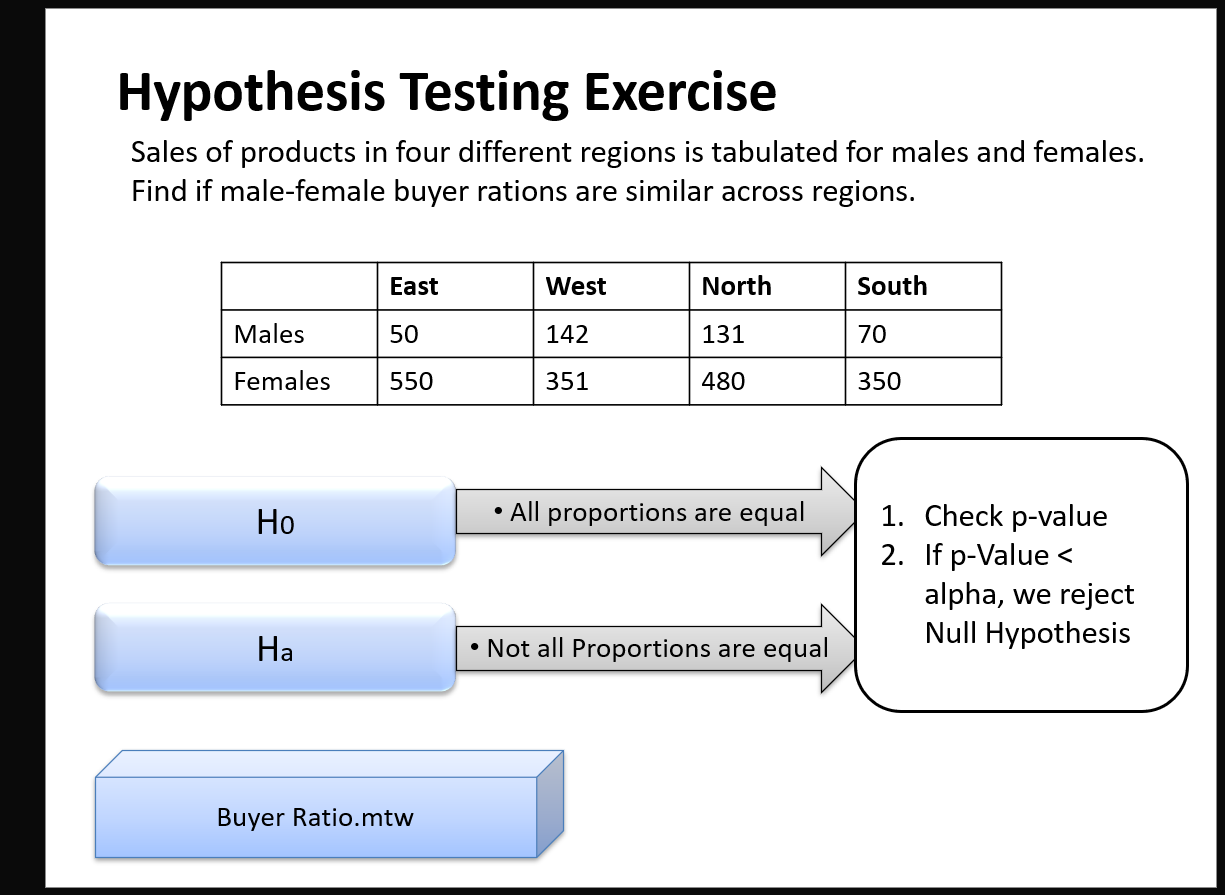

In [24]:
# Assume Null Hypothesis as Ho: 
# Independence of categorical variables (male-female buyer rations are similar across regions (does not vary and are not related)

# Thus Alternate Hypothesis as Ha: 
# Dependence of categorical variables (male-female buyer rations are NOT similar across regions (does vary and somewhat/significantly related)

In [25]:
data=pd.read_csv('/content/BuyerRatio.csv')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Observed Values  2 non-null      object
 1   East             2 non-null      int64 
 2   West             2 non-null      int64 
 3   North            2 non-null      int64 
 4   South            2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 208.0+ bytes


In [28]:
# Make dimensional array
obs=np.array([[50,142,131,70],[435,1523,1356,750]])
obs

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]])

In [29]:
# Chi2 contengency independence test
chi2_contingency(obs) # o/p is (Chi2 stats value, p_value, df, expected obsvations)

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [30]:
# Compare p_value with α = 0.05

In [32]:
##nference:
# As (p-value = 0.6603) > (α = 0.05); Accept the Null Hypothesis
# i.e. Independence of categorical variables 
# Thus, male-female buyer rations are similar across regions and are not related

Q4. TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences.

In [33]:
data=pd.read_csv('/content/Costomer+OrderForm.csv')

In [34]:
data.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [35]:
data.Phillippines.value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [36]:
data.Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [38]:
data.Malta.value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [39]:
data.India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [40]:
# Make a contingency table
obs=np.array([[271,267,269,280],[29,33,31,20]])
obs

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

In [41]:
# Assume Null Hypothesis as Ho: 
# Independence of categorical variables (customer order forms defective %  does not varies by centre)

# Thus, Alternative hypothesis as Ha
# Dependence of categorical variables (customer order forms defective %  varies by centre)

In [42]:
# Chi2 contengency independence test
chi2_contingency(obs) # o/p is (Chi2 stats value, p_value, df, expected obsvations)

(3.858960685820355,
 0.2771020991233135,
 3,
 array([[271.75, 271.75, 271.75, 271.75],
        [ 28.25,  28.25,  28.25,  28.25]]))

In [43]:
# Compare p_value with α = 0.05

In [44]:
# Inference:
# As (p_value = 0.2771) > (α = 0.05); Accept Null Hypthesis
# i.e. Independence of categorical variables 
# Thus, customer order forms defective %  does not varies by centre